In [2]:
import pandas as pd
import numpy as np
import math
import operator
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()

Saving external_normalized - external_normalized.csv to external_normalized - external_normalized.csv


In [4]:
# Importing the dataset
dataset = pd.read_csv('external_normalized - external_normalized.csv')

In [5]:
dataset.describe()

,src_port,dst_port,protocol,eventid
count,21084.000000,21084.000000,21084.000000,21084.000000
mean,24109.967369,450.773952,1.468649,4.868099
std,26190.632749,2213.595076,2.728408,3.229099
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,2.000000
50%,5819.000000,80.000000,0.000000,4.000000
75%,53013.000000,445.000000,1.000000,8.000000
max,65531.000000,59841.000000,14.000000,18.000000


In [6]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21084 entries, 0 to 21083
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   src_ip       21084 non-null  object
 1   dst_ip       13375 non-null  object
 2   src_port     21084 non-null  int64 
 3   dst_port     21084 non-null  int64 
 4   protocol     21084 non-null  int64 
 5   timestamp    21084 non-null  object
 6   eventid      21084 non-null  int64 
 7   ThreatLevel  21084 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.3+ MB


,src_ip,dst_ip,src_port,dst_port,protocol,timestamp,eventid,ThreatLevel
0,185.53.91.46,172.28.0.2,59887,5060,3,33:05.2,1,slightly malicious
1,92.38.163.23,172.28.0.2,37697,135,11,33:06.9,2,malicious
2,92.38.163.23,172.28.0.2,52925,445,1,33:04.6,2,extremely malicious
3,185.53.91.46,172.28.0.2,59887,5060,4,33:05.0,1,malicious
4,196.52.43.119,172.28.0.2,40429,445,1,33:16.9,2,extremely malicious


In [7]:
# Splitting the dataset into the Training set and Test set
p = dataset.iloc[:, [2,3,6]].values
q = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test = train_test_split(p,q,test_size=0.3,random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(p_train,q_train)
        q_pred=knn.predict(p_test)
        scores[k] = metrics.accuracy_score(q_test,q_pred)
        scores_list.append(metrics.accuracy_score(q_test,q_pred))

Text(0, 0.5, 'Testing Accuracy')

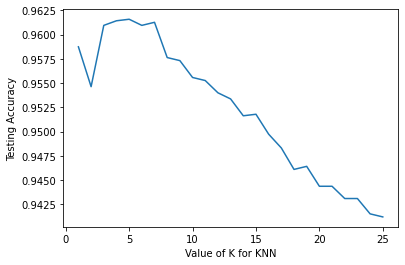

In [9]:
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [10]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(p,q)

KNeighborsClassifier(n_neighbors=4)

In [13]:
y_pred = knn.predict(p_test)
probs_y= knn.predict_proba(p_test)
probs_y = np.round(probs_y, 2)

In [14]:
res = "{:<20} | {:<20} | {:<20} | {:<20} | {:<20}".format("y_test", "y_pred", "Extremely Malicious(%)", "Malicious(%)", "Slightly Malicious(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<20} | {:<20} | {:<20} | {:<20} | {:<20}".format(x, y, a, b, c) for x, y, a, b, c in zip(q_test, q_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test               | y_pred               | Extremely Malicious(%) | Malicious(%)         | Slightly Malicious(%)
-----------------------------------------------------------------
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0                    | 1.0                  | 0.0                  | 0.0                 
0                    | 0   

In [11]:

from sklearn.metrics import accuracy_score
print(accuracy_score(q_test,y_pred))

0.9724944672779007
